In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib.pyplot import *

fname = "pswrgvwall.xls"

data = pd.read_excel(pd.ExcelFile(fname), sheet_name=1)
dates = data.iloc[2:,0].to_numpy()
y = data.iloc[2:,1].dropna().to_numpy()
x = np.arange(0,len(y))


import random
# Markov

def rnum(std_dev=0.08,mean=0,num_samples=1):
    """ returns a normal distribution between -0.4 and 0.4"""    
    random_number = np.random.normal(mean, std_dev, num_samples)
    random_number = np.clip(random_number, -0.4, 0.4)

    return random_number

def stochastic(start,probability_coef=.50,iterations=1000):
    arr = np.zeros(iterations)

    initial = start
    for i in range(len(arr)):
        r = random.random()
        if r < probability_coef:
            initial += abs(rnum() * 0.8)
        else:
            initial -= abs(rnum() * 0.8)

        arr[i] = initial
    return arr

rnum()

array([-0.01665158])

In [2]:
import numpy as np







C:\Users\kl\AppData\Local\Temp\ipykernel_226356\1622841624.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  arr[i] = initial


Regected graphs: 983


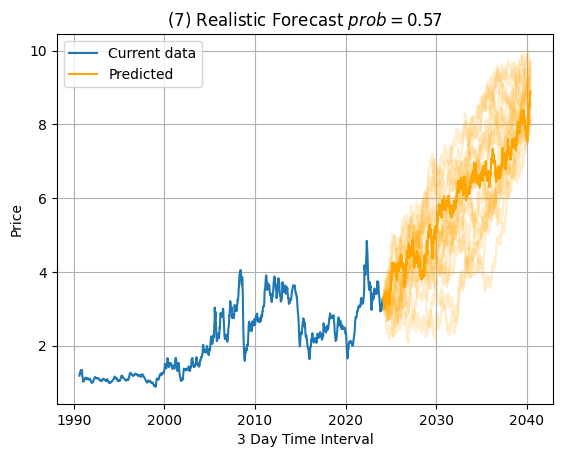

In [62]:
from datetime import timedelta
iters = 1700
# Average time difference 300600.0



start = dates[-1]
extended_dates = []
for i in range(iters):
    start += timedelta(seconds = 300600)
    extended_dates.append(start)
    


pos = len(y)-1
init = y[pos]
arr = stochastic(init,volitility=0.01,iterations=iters)

x_future = np.arange(pos, len(arr)+pos)


plot(dates[:len(y)].tolist(),y,label="Current data")

rej = 0
q = 0
for i in range(1000):
    arr = stochastic(init,iterations=iters,probability_coef=0.57)
    skip = False


    for j in arr:
        if j < 2:
            skip = True
        elif j > 10:
            skip = True
        
        
    alph = 0.01
    if arr[-1] < 15:
        alph = 0.2
    elif arr[-1] < 10:
        alph = 0.6
    elif arr[-1] < 6:
        alph = 0.8


    if skip:
        rej += 1
        continue
    
    if q == 0:
        plot(extended_dates,arr,alpha=1, label="Predicted",color="orange")
        q += 1
    else:
        plot(extended_dates,arr,alpha=alph,color = "orange")
    
    
    
    

title("(7) Realistic Forecast $prob = 0.57$")
xlabel("3 Day Time Interval")
ylabel("Price")
legend()
grid("True")
print(f"Regected graphs: {rej}")
show()

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kl\AppData\Local\Temp\ipykernel_226356\535955013.py:10: SyntaxWarning: invalid escape sequence '\D'
  plot(sorted(t),label="Sorted $\Delta$ Price",color="blue")


Text(0.5, 0, 'Number of points')

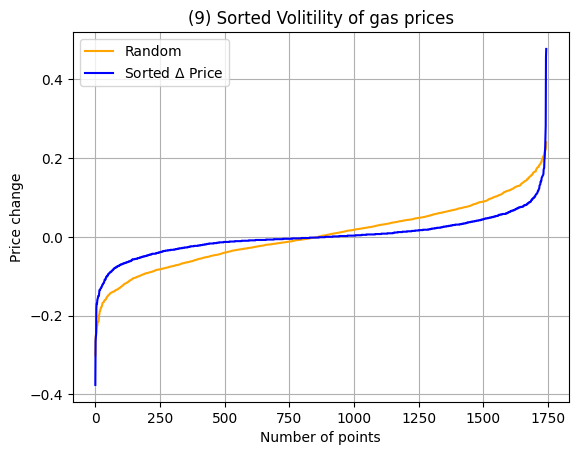

In [61]:
from datetime import timedelta

t = []
for i in range(len(y)-1):
    t.append(y[i+1] - y[i])

ar = sorted(rnum(num_samples=len(t)))

plot(ar,label="Random",color="orange")
plot(sorted(t),label="Sorted $\Delta$ Price",color="blue")
title("(9) Sorted Volitility of gas prices")
legend()
grid("True")
ylabel("Price change")
xlabel("Number of points")

mm

In [5]:
1.38 /2 



0.69